# ЛАБОРАТОРНАЯ РАБОТА №4
## Методы регрессии (НАСА: Профиль крыла самолёта)
Выполнил студент группы 19-ИВТ-3 Марчус К.Р.

Вариант 19.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# исходные данные
df_name = r'airfoil_self_noise_dat.txt'
# видоизмененный датасет
new_df_name = r'lab4d.txt'
# заголовок, который будет добавлен в новый датасет
header = 'frequence,attack_angle,chord_length,fs_velocity,suction,sound_pressure\n'

with open(df_name, 'r', newline='') as read_file, \
         open(new_df_name, 'w', newline='') as write_file:
    list_lines = read_file.readlines()
    # пробежимся по строкам в исходном файле
    for i, line in enumerate(list_lines):
        # заменим знаки табуляции на запятые
        list_lines[i] = line.replace('\t', ',')
        # заменим подряд идущие пробелы на запятые
        max_spaces = 7
        for spaces_number in reversed(range(2, max_spaces)):
            spaces = ' '*spaces_number
            list_lines[i] = list_lines[i].replace(spaces, ',')
        list_lines[i] = list_lines[i].replace('?', '')
        list_lines[i] = list_lines[i].replace(',,', ',')
    # запишем полученные строки и заголовок в новый файл
    write_file.write(header)
    write_file.writelines(list_lines)

In [30]:
df = pd.read_csv(new_df_name, sep=',')
df.head()

,frequence,attack_angle,chord_length,fs_velocity,suction,sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [31]:
df.tail()

,frequence,attack_angle,chord_length,fs_velocity,suction,sound_pressure
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


# ЗАДАНИЕ 1
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

- frequency - частота собственных колебаний крыла самолёта
- attack_angle - угол атаки самолёта
- chord_length - длина хорды
- fs_velocity - скорость набегающего потока
- suction - степень всасывания
- sound_pressure - громкость

# ЗАДАНИЕ 2
Удалите дубликаты строк в наборе данных.

In [4]:
df.shape

(1503, 6)

In [5]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(1503, 6)

# ЗАДАНИЕ 3
Выполните масштабирование количественных признаков. Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [6]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['frequence', 'attack_angle', 'chord_length', 'fs_velocity', 'suction', 'sound_pressure']
categorial:  []


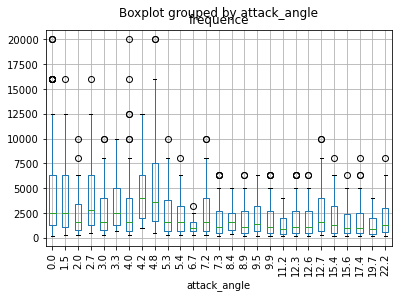

In [7]:
df.boxplot(column='frequence',by='attack_angle',rot=90)
plt.show()

In [8]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,frequence,attack_angle,chord_length,fs_velocity,suction,sound_pressure
0,0.030303,0.0,1.0,1.0,0.039005,0.606829
1,0.040404,0.0,1.0,1.0,0.039005,0.580238
2,0.053030,0.0,1.0,1.0,0.039005,0.600181
3,0.070707,0.0,1.0,1.0,0.039005,0.643790
4,0.090909,0.0,1.0,1.0,0.039005,0.640333


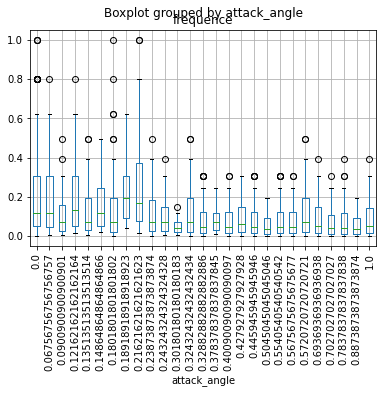

In [9]:
df.boxplot(column='frequence',by='attack_angle',rot=90)
plt.show()

# ЗАДАНИЕ 4
Выполните заменту категориальных признаков. Выберите и обоснуйте способ замены.

- Нет категориальных признаков

# ЗАДАНИЕ 5
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

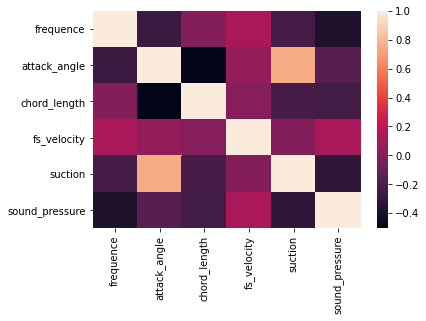

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix);
plt.show()

# ЗАДАНИЕ 6
Заполните пропущенные значения в данных

In [27]:
print("dataset size: ", df.shape)
df.count()

dataset size:  (1503, 6)


frequence         1503
attack_angle      1503
chord_length      1503
fs_velocity       1503
suction           1503
sound_pressure    1503
dtype: int64

- Пропущенных значений нет

# ЗАДАНИЕ 7
Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.

- Линейная регрессия, LASSO регуляризатор. 

In [12]:
X, y = df.drop([], axis=1), df['fs_velocity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) #30% тестовых наборов, 70% обучающих
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1)

In [13]:
reg.coef_

array([0.        , 0.        , 0.        , 0.35299372, 0.        ,
       0.        ])

In [14]:
xt = reg.predict(X_test) #реальное
print(xt[:10])

[0.31244356 0.52459635 0.31244356 0.52459635 0.66543728 0.38286403
 0.52459635 0.52459635 0.66543728 0.52459635]


In [15]:
print(y_test[:10]) #предсказанное

61      0.000000
1025    0.601010
1333    0.000000
817     0.601010
725     1.000000
569     0.199495
1019    0.601010
1023    0.601010
256     1.000000
1079    0.601010
Name: fs_velocity, dtype: float64


In [16]:
print(xt[:10]-y_test[:10]) #точность

61      0.312444
1025   -0.076414
1333    0.312444
817    -0.076414
725    -0.334563
569     0.183369
1019   -0.076414
1023   -0.076414
256    -0.334563
1079   -0.076414
Name: fs_velocity, dtype: float64


In [17]:
reg.intercept_

0.3124435622412153

- Линейная регрессия без использования регуляризаторов

In [18]:
X, y = df.drop([], axis=1), df['fs_velocity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) #30% тестовых наборов, 70% обучающих
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
reg.coef_

array([-2.62383314e-16, -6.10622664e-16, -3.64291930e-16,  1.00000000e+00,
        6.10622664e-16, -2.22044605e-16])

In [20]:
reg.intercept_

2.7755575615628914e-16

In [21]:
corr={}
corr['pearson'], _ = pearsonr(xt,y_test)
corr['spearman'], _ = spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.9999999999999997
1.0
